In [163]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [164]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Partie 1: Regression 

Les points sont proportionnels à la difficulté des questions. Justifiez toutes vos réponses et étapes du 
raisonnement. Tous les tests sont demandés à 5% sauf si spécifié dans la question. 

##   1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [167]:
# Import des données 
df = pd.read_csv("/content/Drive/MyDrive/Projet Econométrie/Data/MROZ.raw", 
                 delim_whitespace=True,
                 header = None )

In [168]:
# Import des noms de colonnes
head = pd.read_csv("/content/Drive/MyDrive/Projet Econométrie/Data/MROZ.DES", 
                   delim_whitespace=True,
                   usecols=[1]).drop([0, 1, 2, 3]).values.flatten()

In [169]:
# Attribuer les colonnes 
df.columns = head

In [170]:
# Visualisation des premières lignes 
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [171]:
# Suppression des lignes avec les valeurs '.'
data = df.loc[df['wage']!= '.']
data = data.reset_index(drop = True)

# Selection des lignes avec wage strictement positif
data['wage'] = data['wage'].apply(lambda x : float(x))
data = data.loc[data['wage']>0]
data.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


## 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter

#### 2.1 Statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes

In [172]:
data[['wage','age','educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


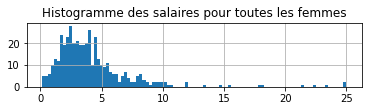

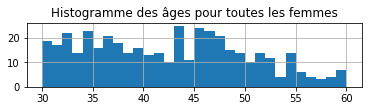

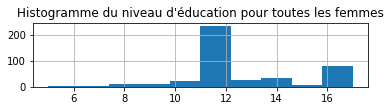

In [173]:
###### Histograme    ######
## Salaire ##
plt.subplot(3,1,1)
data['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
data['age'].hist(bins = 30);
plt.title("Histogramme des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
data['educ'].hist(bins = 10);
plt.title("Histogramme du niveau d'éducation pour toutes les femmes")
plt.show()

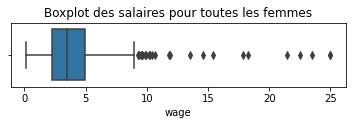

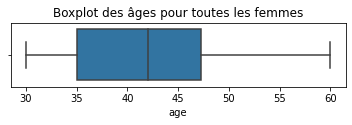

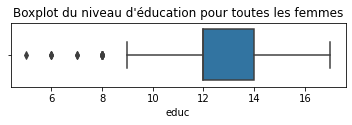

In [174]:
##### Boxplots #####
## Salaire ##
plt.subplot(3,1,1)
sns.boxplot(data = data, x = 'wage')
plt.title("Boxplot des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
sns.boxplot(data = data, x = 'age')
plt.title("Boxplot des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
sns.boxplot(data = data, x = 'educ')
plt.title("Boxplot du niveau d'éducation pour toutes les femmes")
plt.show()

#### 2.2 Statistiques descriptives du salaire, de l’age et de l’éducation pour les femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon

###### Selection des femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon

In [175]:
# 65ème percentile de l’échantillon du salaire du mari 
percentile_65 = np.percentile(data['huswage'], 65)

In [176]:
# Selection des femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon
selected_woman_sup_65 = data.loc[data['huswage']>percentile_65]
selected_woman_sup_65 

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5,19.49998,.3285121,25
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7,20.10006,1.524272,49
10,1,1969,0,1,33,12,4.0630,4.30,2450,34,12,9.7959,32300,0.5815,12,3,5.0,0,15,24.29995,1.401922,225
11,1,1960,0,1,42,11,4.5918,4.58,2375,47,14,8.0000,28700,0.6215,14,7,5.0,0,14,19.70007,1.524272,196
14,1,1848,0,1,43,10,3.6797,3.38,2024,45,17,10.8700,31431,0.5815,7,7,7.5,1,6,24.63091,1.302831,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,120,1,3,36,12,25.0000,9.98,2500,35,12,8.4000,24000,0.6615,12,10,9.5,1,4,21.00000,3.218876,16
411,1,225,1,2,40,17,1.7778,0.00,1278,38,17,19.5620,25490,0.6615,16,17,14.0,1,8,25.08999,.5753766,64
415,1,1170,1,2,39,13,0.2137,0.00,1920,47,12,7.8646,16370,0.7215,12,16,11.0,1,1,16.11997,-1.543182,1
422,1,460,2,0,32,17,4.7826,0.00,1850,31,17,8.1081,17300,0.7215,7,7,7.5,0,14,15.10000,1.564984,196


###### Affichage des statistiques

In [177]:
selected_woman_sup_65[['wage','age','educ']].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


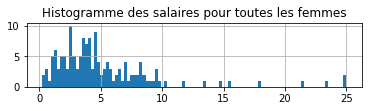

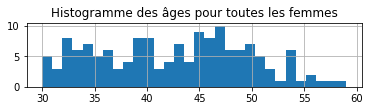

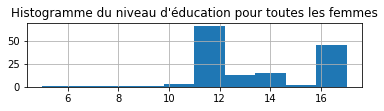

In [178]:
###### Histograme    ######
## Salaire ##
plt.subplot(3,1,1)
selected_woman_sup_65['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
selected_woman_sup_65['age'].hist(bins = 30);
plt.title("Histogramme des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
selected_woman_sup_65['educ'].hist(bins = 10);
plt.title("Histogramme du niveau d'éducation pour toutes les femmes")
plt.show()


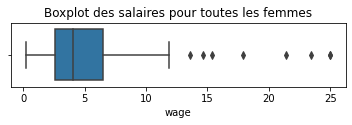

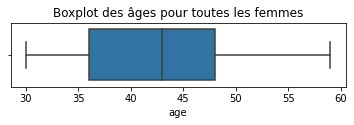

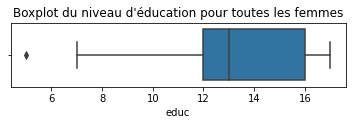

In [179]:
##### Boxplots #####
## Salaire ##
plt.subplot(3,1,1)
sns.boxplot(data = selected_woman_sup_65, x = 'wage')
plt.title("Boxplot des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
sns.boxplot(data = selected_woman_sup_65, x = 'age')
plt.title("Boxplot des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
sns.boxplot(data = selected_woman_sup_65, x = 'educ')
plt.title("Boxplot du niveau d'éducation pour toutes les femmes")
plt.show()

#### 2.3 Statistiques descriptives du salaire, de l’age et de l’éducation pour les femmes dont le salaire du mari est inferieur au 65ème percentile de l’échantillon

In [180]:
# 65ème percentile de l’échantillon du salaire du mari 
percentile_65 = np.percentile(data['huswage'], 65)

# Selection des femmes dont le salaire du mari est inferieur au 65ème percentile de l’échantillon
selected_woman_inf_65 = data.loc[data['huswage']<percentile_65]
selected_woman_inf_65 

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,11,6.7106,19495,0.6915,14,7,7.5,1,33,9.859054,1.55648,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,12,3.4277,21152,0.6915,14,7,5.0,0,11,9.152048,2.12026,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,50,1,1,45,12,3.4600,5.00,1780,46,10,6.7416,23882,0.7215,7,7,9.5,1,9,23.709000,1.241269,81
423,1,680,0,5,36,10,2.3118,0.00,3430,43,12,5.3061,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,8,7.2709,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,12,7.1006,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


###### Affichage des statistiques

In [181]:
selected_woman_inf_65[['wage','age','educ']].describe()

,wage,age,educ
count,276.000000,276.000000,276.000000
mean,3.653995,41.583333,12.221014
std,2.471311,7.910656,2.126472
min,0.128200,30.000000,6.000000
25%,2.139100,35.000000,12.000000
50%,3.169700,41.000000,12.000000
75%,4.508775,47.000000,12.250000
max,22.500000,60.000000,17.000000


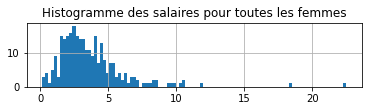

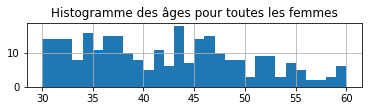

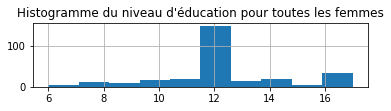

In [182]:
###### Histograme    ######
## Salaire ##
plt.subplot(3,1,1)
selected_woman_inf_65['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
selected_woman_inf_65['age'].hist(bins = 30);
plt.title("Histogramme des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
selected_woman_inf_65['educ'].hist(bins = 10);
plt.title("Histogramme du niveau d'éducation pour toutes les femmes")
plt.show()


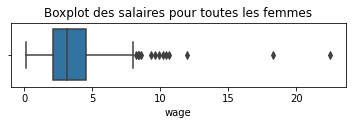

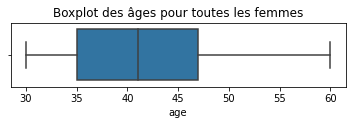

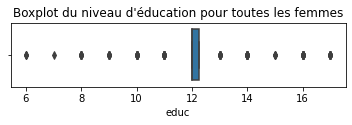

In [183]:
##### Boxplots #####
## Salaire ##
plt.subplot(3,1,1)
sns.boxplot(data = selected_woman_inf_65, x = 'wage')
plt.title("Boxplot des salaires pour toutes les femmes")
plt.show()
## Ages ##
plt.subplot(3,1,2)
sns.boxplot(data = selected_woman_inf_65, x = 'age')
plt.title("Boxplot des âges pour toutes les femmes")
plt.show()
## Educations ##
plt.subplot(3,1,3)
sns.boxplot(data = selected_woman_inf_65, x = 'educ')
plt.title("Boxplot du niveau d'éducation pour toutes les femmes")
plt.show()

#### 2.3  Comparaison et Commentaires 

###### Sur le Salaire

In [184]:
Salaire=data[['wage']].describe()
Salaire["common Wage"]=data[['wage']].describe()
Salaire["Sup_65"]=selected_woman_sup_65[['wage']].describe()
Salaire["Inf_65"]=selected_woman_inf_65[['wage']].describe()
Salaire=Salaire.iloc[:,1:]
Salaire

,common Wage,Sup_65,Inf_65
count,428.000000,148.000000,276.000000
mean,4.177682,5.139315,3.653995
std,3.310282,4.351728,2.471311
min,0.128200,0.213700,0.128200
25%,2.262600,2.561925,2.139100
50%,3.481900,4.008050,3.169700
75%,4.970750,6.516300,4.508775
max,25.000000,25.000000,22.500000


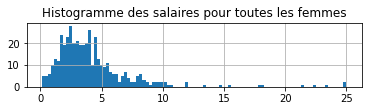

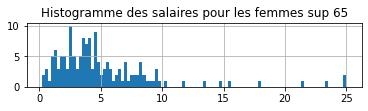

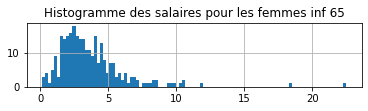

In [185]:
plt.subplot(3,1,1)
data['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
selected_woman_sup_65['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
selected_woman_inf_65['wage'].hist(bins = 100);
plt.title("Histogramme des salaires pour les femmes inf 65")
plt.show()



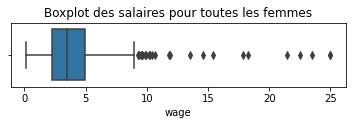

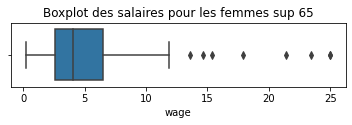

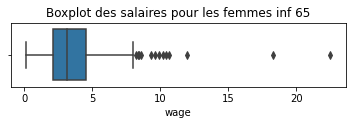

In [186]:
plt.subplot(3,1,1)
sns.boxplot(data = data, x = 'wage')
plt.title("Boxplot des salaires pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
sns.boxplot(data = selected_woman_sup_65, x = 'wage')
plt.title("Boxplot des salaires pour les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
sns.boxplot(data = selected_woman_inf_65, x = 'wage')
plt.title("Boxplot des salaires pour les femmes inf 65")
plt.show()

Pour la variable salaire, on remarque que les femmes  dont le salaire du mari est supérieur au 65ème percentile de l’échantillon (groupe A), ont en général un salaire supérieur à la moyenne et un écart-type plus important, alors que les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon (groupe B) a en moyenne un salaire inférieur à la moyenne de notre echantillon et un écart-type plus faible. On peut donc faire l'hypothèse que les femmes du groupe B auront un profil généralement proche (un salaire moindre par rapport au commun des femmes) tandis que les femmes du groupe A auront des profils plus hétéroclites.

###### Sur l'age

In [187]:
Age=data[['age']].describe()
Age["common Wage"]=data[['age']].describe()
Age["Sup_65"]=selected_woman_sup_65[['age']].describe()
Age["Inf_65"]=selected_woman_inf_65[['age']].describe()
Age=Age.iloc[:,1:]
Age

,common Wage,Sup_65,Inf_65
count,428.000000,148.00000,276.000000
mean,41.971963,42.52027,41.583333
std,7.721084,7.35168,7.910656
min,30.000000,30.00000,30.000000
25%,35.000000,36.00000,35.000000
50%,42.000000,43.00000,41.000000
75%,47.250000,48.00000,47.000000
max,60.000000,59.00000,60.000000


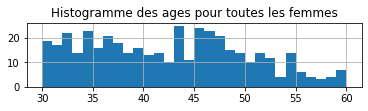

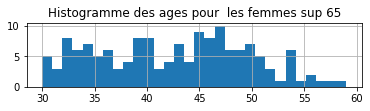

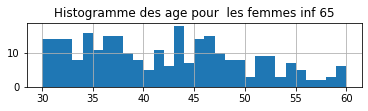

In [188]:
plt.subplot(3,1,1)
data['age'].hist(bins = 30);
plt.title("Histogramme des ages pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
selected_woman_sup_65['age'].hist(bins = 30);
plt.title("Histogramme des ages pour  les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
selected_woman_inf_65['age'].hist(bins = 30);
plt.title("Histogramme des age pour  les femmes inf 65")
plt.show()


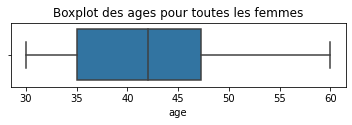

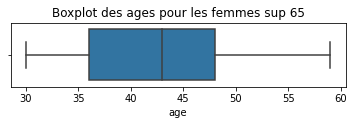

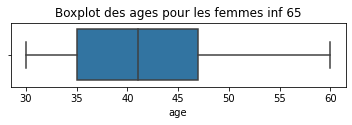

In [189]:
plt.subplot(3,1,1)
sns.boxplot(data = data, x = 'age')
plt.title("Boxplot des ages pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
sns.boxplot(data = selected_woman_sup_65, x = 'age')
plt.title("Boxplot des ages pour les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
sns.boxplot(data = selected_woman_inf_65, x = 'age')
plt.title("Boxplot des ages pour les femmes inf 65")
plt.show()

Au niveau de le variable âge, on remarque qu'en général les femmes faisant partie du groupe A sont plus âgées que la moyenne des femmes tandis que celle du groupe B est plus jeune, les écarts type entre chaque groupe quasiment similaire.

###### Sur l'education

In [190]:
Education=data[['educ']].describe()
Education["common Wage"]=data[['educ']].describe()
Education["Sup_65"]=selected_woman_sup_65[['educ']].describe()
Education["Inf_65"]=selected_woman_inf_65[['educ']].describe()
Education=Education.iloc[:,1:]
Education

,common Wage,Sup_65,Inf_65
count,428.000000,148.000000,276.000000
mean,12.658879,13.520270,12.221014
std,2.285376,2.345845,2.126472
min,5.000000,5.000000,6.000000
25%,12.000000,12.000000,12.000000
50%,12.000000,13.000000,12.000000
75%,14.000000,16.000000,12.250000
max,17.000000,17.000000,17.000000


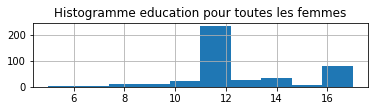

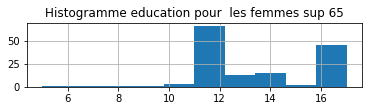

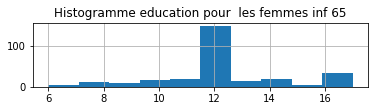

In [191]:
plt.subplot(3,1,1)
data['educ'].hist(bins = 10);
plt.title("Histogramme education pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
selected_woman_sup_65['educ'].hist(bins = 10);
plt.title("Histogramme education pour  les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
selected_woman_inf_65['educ'].hist(bins = 10);
plt.title("Histogramme education pour  les femmes inf 65")
plt.show()


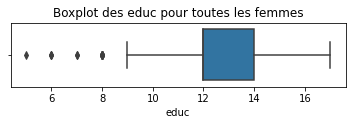

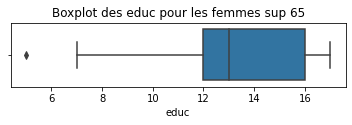

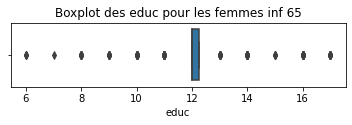

In [192]:
plt.subplot(3,1,1)
sns.boxplot(data = data, x = 'educ')
plt.title("Boxplot des educ pour toutes les femmes")
plt.show()

plt.subplot(3,1,2)
sns.boxplot(data = selected_woman_sup_65, x = 'educ')
plt.title("Boxplot des educ pour les femmes sup 65")
plt.show()

plt.subplot(3,1,3)
sns.boxplot(data = selected_woman_inf_65, x = 'educ')
plt.title("Boxplot des educ pour les femmes inf 65")
plt.show()

Pour la variable éducation, on  constate que les femmes du groupe A feront en moyenne de plus longque étude par rapport à la moyenne de l'ensemble de l'Échantillon, tandis qu'à l'opposé les femmes du groupe B feront moins d'années d'études. On remarque également que les écarts-types de non trois group

En conclusion les variables salaires, âge et duc sont corrélés avec la variable huswage

## 3. Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme


#### Histogramme de la variable wage 

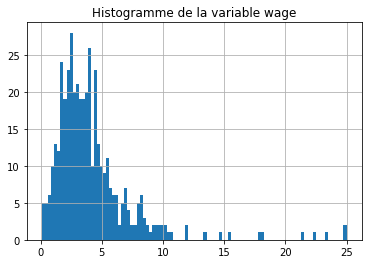

In [193]:
# Histogramme de la variable wage 
data['wage'].hist(bins = 100)
plt.title("Histogramme de la variable wage")
plt.show()

#### Histogramme de la variable wage  en supprimant les observations à plus de 3 écarts types

In [194]:
# Calcul ecart type et moyenne 
std = data['wage'].std()
mean = data['wage'].mean()

# Détermination des bornes inf et sup 
b_inf = mean - 3*std
b_sup = mean + 3*std

print(b_inf, b_sup)

-5.753165620456982 14.108528704569132


In [195]:
# Selection des données 
selected_data = data.loc[(data['wage']> b_inf ) & (data['wage']<b_sup) ]

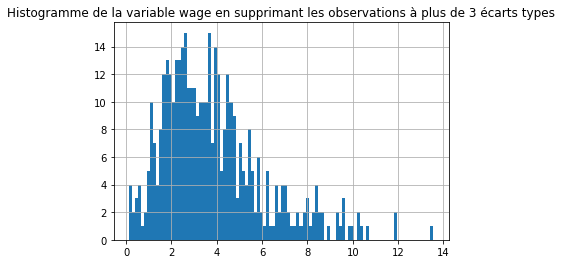

In [196]:
# Histogramme de la variable wage 
selected_data['wage'].hist(bins = 100)
plt.title("Histogramme de la variable wage en supprimant les observations à plus de 3 écarts types")
plt.show()

## 4. Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.

#### Correlation entre motheduc et fatheduc

In [197]:
# Correlation motheduc
data.corr()[['motheduc']]

,motheduc
inlf,NaN
hours,-0.018517
kidslt6,0.061448
kidsge6,0.045484
age,-0.224894
educ,0.387020
wage,0.057074
repwage,0.040890
hushrs,0.074563
husage,-0.219482


In [198]:
data['motheduc'].corr(data['fatheduc'])

0.5540632184311677

#### Explication du problème de multicolinéarité

Les variables motheduc et fatheduc sont très corrélées. Ceci pourrait expliquer que les niveaux d'éducation de la mère et du père sont en général corrélées. Ceci impliquerait donc la présence d'une colinéarité entre ces deux variables/ 

- Voir aussi si le problème est récurrent dans un couple. 

In [199]:
data['educ'].corr(data['huseduc'])

0.5943432517616803

Dans une régression, la multicolinéarité est un problème qui survient 
lorsque certaines variables de prévision du modèle mesurent le même phénomène. Une multicolinéarité prononcée s’avère problématique, car elle peut augmenter la variance des coefficients de régression et les rendre instables et difficiles à interpréter. 

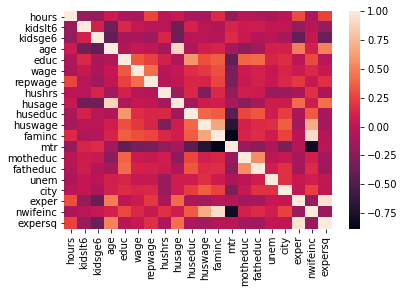

In [200]:
sns.heatmap(data.iloc[1:,1:].corr())

In [201]:
data.corr()[['educ']]

,educ
inlf,NaN
hours,-0.064879
kidslt6,0.129340
kidsge6,-0.092536
age,-0.052171
educ,1.000000
wage,0.341954
repwage,0.243486
hushrs,0.095877
husage,-0.069858


Du fait d'une forte corrélation positive entre les variables educ, huseduc, 
fatheduc et dans la moindre mesure motheduc, nous ne  sommes pas vraiment dans  le cas d'un problème à multicolinéarité. Cependant ces corrélations relativement élevées peuvent néanmoins poser des difficultés au modèle notamment dans la significativité des coefficients de régression.

## 5. Faites un graphique en nuage de point entre wage et educ,. S'agit-il d'un effet "toute chose  étant égale par ailleurs ?"

#### Graphique en nuage de point entre wage et educ

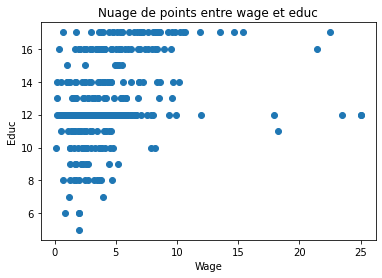

In [202]:
# Graphique en nuage de point entre wage et educ,
plt.scatter(x = data['wage'], y = data['educ'] )
plt.title("Nuage de points entre wage et educ")
plt.xlabel("Wage")
plt.ylabel("Educ")
plt.show()

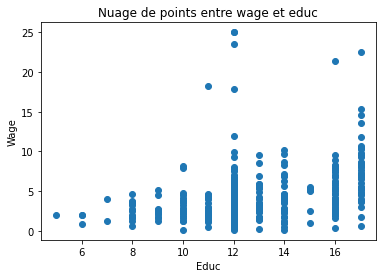

In [203]:
# Graphique en nuage de point entre wage et educ,
plt.scatter(x = data['educ'], y =  data['wage'])
plt.title("Nuage de points entre wage et educ")
plt.xlabel("Educ")
plt.ylabel("Wage")
plt.show()

#### S'agit-il d'un effet "toute chose étant égale par ailleurs ?

On remarque une corrélation positive entre les variables wage et educ. Cependant, il ne s'agit pas d'un effet "toute chose étant égale par ailleurs".
En effet, nous ne prenons pas en compte plusieurs variables (non observées) qui ont une forte influence sur le salaire, tel que la compétence physique ou intellectuelle d'un salarié, ou la pénibilité de la tache.



## 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

L'hypothèse fondamentale qui garantit des estimateurs non biaisés est que le terme d'erreur $\mu$ ne soit pas corrélé avec les régresseurs (l'endogénéité) et que sa moyenne  soit nulle ($E[\mu]=0$). Ignorer cette  hypothèse dans l'estimation viole l'hypothèse d'orthogonalité présente dans le théorème de Gauss-Markov. En effet , si une ou plusieurs variables explicatives sont corrélés avec le terme d'erreur, alors le coefficient estimé par l'estimateur des moindres carrés ordinaires (MCO) sera biaisé. 
  
l

## 7. Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

### Modèle avec constante  


#### Construction Design Matrix et  log de wage 



In [204]:
log_wage = data['wage'].apply(lambda x: np.log(x))

In [205]:
X = data[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]

#X["const"]= 1
X["const"] = np.ones(X.shape[0])

X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,city,educ,exper,nwifeinc,kidslt6,kidsge6,const
0,0,12,14,10.910060,1,0,1.0
1,1,12,5,19.499980,0,2,1.0
2,0,12,15,12.039910,1,3,1.0
3,0,12,6,6.799996,0,3,1.0
4,1,14,7,20.100060,1,2,1.0
...,...,...,...,...,...,...,...
423,0,10,2,18.199980,0,5,1.0
424,1,12,21,22.641060,0,1,1.0
425,1,13,22,21.640080,0,2,1.0
426,1,12,14,23.999980,0,1,1.0


#### Regression

In [206]:
model = sm.OLS(log_wage, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.00e-13
Time:                        20:48:55   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
city           0.0353      0.070      0.503      0.616      -0.103       0.173
educ           0.1022      0.015      6.771      0.000       0.073       0.132
exper          0.0155      0.004      3.452      0.001       0.007       0.024
nwifeinc       0.0049      0.003      1.466      0.143      -0.002       0.011
kidslt6       -0.0453      0.085     -0.531      0.596      -0.213       0.122
kidsge6       -0.0117      0.027     -0.434      0.664      -0.065       0.041
const         -0.3990      0.207     -1.927      0.055      -0.806       0.008
==============================================================================
Omnibus:                       79.542   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.193
Skew:                          -0.795   Prob(JB):                     4.33e-63
Kurtosis:                       6.685   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Histogrammes des résidus

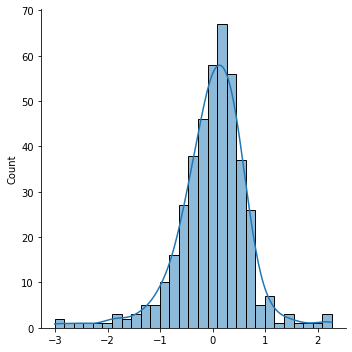

In [207]:
# Histogrammes des résidus 
residus = results.resid
sns.displot(residus, kde = True)
plt.show()

Du point de vue général, la forme de l'histogramme des résidus est proche d'une gaussienne centrée en 0. Néanmoins, la traine gauche de la courbe étant plus longue que celle de droite cela reflete donc une assymetire négative.

### Modèle sans constante  


#### Construction Design Matrix et  log de wage 



In [208]:
log_wage = data['wage'].apply(lambda x: np.log(x))

In [209]:
X = data[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
X["const"]=np.ones(X.shape[0])
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,educ,exper,nwifeinc,kidslt6,kidsge6,const
0,0,12,14,10.910060,1,0,1.0
1,1,12,5,19.499980,0,2,1.0
2,0,12,15,12.039910,1,3,1.0
3,0,12,6,6.799996,0,3,1.0
4,1,14,7,20.100060,1,2,1.0
...,...,...,...,...,...,...,...
423,0,10,2,18.199980,0,5,1.0
424,1,12,21,22.641060,0,1,1.0
425,1,13,22,21.640080,0,2,1.0
426,1,12,14,23.999980,0,1,1.0


#### Regression

In [210]:
model = sm.OLS(log_wage, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.00e-13
Time:                        20:48:57   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
city           0.0353      0.070      0.503      0.616      -0.103       0.173
educ           0.1022      0.015      6.771      0.000       0.073       0.132
exper          0.0155      0.004      3.452      0.001       0.007       0.024
nwifeinc       0.0049      0.003      1.466      0.143      -0.002       0.011
kidslt6       -0.0453      0.085     -0.531      0.596      -0.213       0.122
kidsge6       -0.0117      0.027     -0.434      0.664      -0.065       0.041
const         -0.3990      0.207     -1.927      0.055      -0.806       0.008
==============================================================================
Omnibus:                       79.542   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.193
Skew:                          -0.795   Prob(JB):                     4.33e-63
Kurtosis:                       6.685   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Histogrammes des résidus

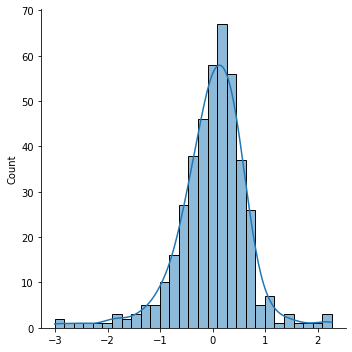

In [211]:
# Histogrammes des résidus 
residus = results.resid
sns.displot(residus, kde = True)
plt.show()

Du point de vue général, la forme de l'histogramme des résidus est proche d'une gaussienne centrée en 0. Néanmoins, la traine gauche de la courbe étant plus longue que celle de droite cela reflete donc une assymetire négative.

## 8. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values. 

#### Test de l'hyphothèse

In [212]:
log_wage

0      1.210154
1      0.328512
2      1.514138
3      0.092123
4      1.524272
         ...   
423    0.838026
424    1.668857
425    1.769429
426    1.226448
427    1.406489
Name: wage, Length: 428, dtype: float64

In [213]:
n,m = X.shape

# Calcule de l'ecart type de l estimateur des moindres carrées
s2=np.sum(np.array(residus)**2)/(n-m) # somme des residus au carré / n-m
sigma_â= np.sqrt(np.diag(s2*  np.linalg.inv(X.T @ X)))

# Estimateur â 
a_chapeau =  np.linalg.inv(X.T @ X) @ X.T  @ log_wage

# tstat 
Z = a_chapeau/sigma_â   # test a = 0

# on recupere la valeur de l'estimateur du coefficient de  nwifeinc
Z_nwifeinc=Z[3]


In [214]:
Z_nwifeinc

1.4659517416241157

On est sur un test de student du type bilatéral, c'est-à-dire pour déterminer si la variable nwifeinc est significative, il faudra tester l'hypothèse

$H_0 :   a = 0$  
$H_1 :   a \ne 0$   

\

On definit : 
- $â_{nwifeinc}$ : estimateur du coefficient  de  nwifeinc  dans le modèle etudié 

- $a_{nwifeinc}$   : coefficient de  nwifeinc dans le modèle etudié 
- $\sigma_{â} = (Y-\hat{Y})^2 (X^TX)^{-1}$

Nous définissons la t-statistique $ Z_{nwifeinc} $  telle que $ Z_{nwifeinc}= \frac{â_{nwifeinc} - a_{nwifeinc}}{\sigma_â} $.  
Sous l'hypothèse $H_0$ , nous avons $ Z_{nwifeinc}= \frac{â_{nwifeinc}}{\sigma_â} \approx 1.47 $  
On pose $\alpha$ le seuil de risque de significativité tel que $\alpha = {0.01, 0.05, 0.1}$  
Si $|Z_{nwifeinc}| > 1 - \frac{alpha}{2} $ on rejette l'hypothèse nulle.

In [239]:
for alpha in [0.01,0.05,0.1]:
    print("Pour le risque alpha = ", alpha )
    # constante prise en compte dans m
    ppf_seuil = 2*stats.t.isf(alpha/2, n-m)
    if  Z_nwifeinc > ppf_seuil :
        print("l'hypothése nulle est rejeté, nwifeinc n'est pas significtive")
    else: 
        print("On accepte l'hypothèse de non-significativité")
    print('p_value :', 2 * stats.t.sf(ppf_seuil,n-m), '\n')

Pour le risque alpha =  0.01
On accepte l'hypothèse de non-significativité
p_value : 3.5333096948479134e-07 

Pour le risque alpha =  0.05
On accepte l'hypothèse de non-significativité
p_value : 9.878952107382961e-05 

Pour le risque alpha =  0.1
On accepte l'hypothèse de non-significativité
p_value : 0.0010602435910751766 



### Conclusions

Les p-values sont inférieurs au seuils critiques pour tous les risques étudiés 0.01, 0.05 et 0.1. L'hypothèse H0 est rejetée et l'hypothèse H1 est acceptée pour tous les risques étudiés.  
Les coefficients de nwifeinc sont donc non nuls pour ce modèle.

## 9. Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

### Test de l'hypothèse

On est sur un test de student du type bilatéral, c'est-à-dire pour déterminer si la variable nwifeinc est significative, il faudra tester l'hypothèse

- $H_0 :   a = 0.01 $  
- $H_1 :   a \ne 0.01$   

\

Ceci revient à étudier l'hypothèse suivante: \

- $H_0 :   a - 0.01 = 0$  
- $H_1 :   a - 0.01 \ne 0$   

\


On definit : 
- $â_{nwifeinc}$ : estimateur du coefficient  de  nwifeinc  dans le modèle etudié 

- $a_{nwifeinc}$   : coefficient de  nwifeinc dans le modèle etudié 
- $\sigma_{â} = (Y-\hat{Y})^2 (X^TX)^{-1}$

Nous définissons la t-statistique $ Z_{nwifeinc} $  telle que $ Z_{nwifeinc}= \frac{â_{nwifeinc} - a_{nwifeinc}}{\sigma_â} $.  
Sous l'hypothèse $H_0$ , nous avons $ Z_{nwifeinc}= \frac{â_{nwifeinc}}{\sigma_â} \approx 1.47 $  
On pose $\alpha$ le seuil de risque de significativité tel que $\alpha = {0.01, 0.05, 0.1}$  
Si $|Z_{nwifeinc}| > 1 - \frac{alpha}{2} $ on rejette l'hypothèse nulle. 









In [216]:
# tstat 
Z = (a_chapeau - 0.01)/sigma_â   # test a = 0

# on recupere la valeur de l'estimateur du coefficient de  nwifeinc
Z_nwifeinc=Z[3]


In [217]:
Z_nwifeinc

-1.5363887846745357

In [218]:

alpha = 0.05
print("Pour le risque alpha = ", alpha )
isf_seuil = 2*stats.t.isf(alpha/2, n-m)
if  Z_nwifeinc > isf_seuil :
    print("l'hypothése nulle est rejeté, nwifeinc n'est pas significtive")
else: 
    print("On accepte l'hypothèse de non-significativité")
print('p_value =', 2 * stats.t.sf(isf_seuil/2,n-m))

Pour le risque alpha =  0.05
On accepte l'hypothèse de non-significativité
p_value = 0.050000000000006393


In [219]:
isf_seuil/2

1.9656147920080864

### Conclusion

La p-value est légèrement supérieur au risque,  donc H0 est acceptée, et le modèle contraint est validé.


## 10. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

### Test de l'hypothèse

Le modèle est supposé satisfaire aux hypothèses des moindres carrés ordinaires (MCO), avec aléa normal (c'est-à-dire que les résidus $\epsilon$ (également appelé bruit) sont indépendants et de même loi normale N(0,$\sigma_â$)), $\sigma_â$ correspondant au coefficient en question.

Dans cette question l'hypothèse $H_0$ posée est jointe, car vise à étudier deux coefficients $a_{nwifeinc}$ et  $a_{city}$. 
L'hypothèse H0 est la suivante: 
- H0: $a_{nwifeinc}$ = 0.01 et $a_{city}$ = 0.05
- H1: $a_{nwifeinc}  \ne 0.01$ ou $a_{city}  \ne 0.05$

Pour tester cette hypothèse, nous utiliserons le test de Fisher.    

Sous $H_0$, le nombre des variables explicatives est diminué du nombre de conditions élémentaires (dans ce cas 2). On pose donc le modèle suivant :

- $$log(wage) - 0.01  nwifeinc - 0.05 city = a_{educ}  educ + a_{exper}  exper + a_{kidslt6} kidslt6 + a_{kidsgt6} kidsgt6 + cte + \epsilon $$  
  



Tandis que sous $H_1$ nous avons le modèle standard de notre régression :   
- $$ log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidslt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + cte + \epsilon $$   
  
  

Ainsi sous l'hypothèse nulle, nous définissons F la statistique de Fisher, telle que:  
$F = \frac{\frac{SCR_0 - SCR_1}{dl0 -dl1}} {\frac{SCR1}{dl1}}$  
Où
- $SCR_0$ est la somme des carrés des résidus de la régression par les mco du modèle $H_0$.    
-$SCR_1$ est la somme des carrés des résidus de la régression par les mco du modèle $H_1$
-$dl0$ et $dl1$ sont respectivement les degrés de liberté des modèle $H_0$ et $H1$.
  
Si $H_0$ est vrai, la statistique $F$ suit une loi de Fisher.






In [220]:
# Modele sous H0
Y_H0 =  log_wage - 0.01 * data["nwifeinc"]  - 0.05 * data["city"]
X_H0 = data[['educ','exper','kidslt6','kidsge6']]
X_H0['const']= np.ones(len(X_H0))


# Calcul estimateur des MCO
model_H0 = sm.OLS(Y_H0, X_H0)
results_H0 = model_H0.fit()
residus_H0 = results_H0.resid

# Creation de la stat de fisher 
SCR0 = np.sum(np.array(residus_H0)**2) # somme des residus au carré 
SCR1 = np.sum(np.array(residus)**2) # somme des residus au carré 

# j ai un doute si on doit soustraire les dl par 
dl0 = X_H0.shape[0] -  X_H0.shape[1]  - 1 #  à verifier le - 1
dl1 = X.shape[0] -  X.shape[1] -1

F= ((SCR0 - SCR1) / (dl0 - dl1)) / (SCR1 / dl1)

# Calcul de la P_value 
P_value = 1- stats.f.cdf(F, dl0 - dl1, dl1)

print("la statistique F veut  : ", F)
print("la P_Value est : ", P_value)

la statistique F veut  :  1.3338941768890733
la P_Value est :  0.26456305438708805


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Nous obetenons une P_Value $\approx$ 0.26 > 0.05, l'hypothèse $H_0$ est vrai.


## 11. Tester l’hypothèse joint que nwifeinc+city=0.1 et educ+exper=0.1


On rappelle que notre modèle principal est la suivante :  
$\Rightarrow$ $log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidslt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + cte + \epsilon $   

\\

Sous $H_0$ on pose:  $a_{nwifeinc} + a_{city} = 0.1$ et $a_{educ} + a_{exper} = 0.1$ , il est donc nécessaire de recirer notre modèle sous l'hypothèse nulle :  

\\
    
$\Rightarrow$ $log(wage) = a_{city} city+ a_{nwifeinc}  nwifeinc +  a_{city}     nwifeinc -  a_{city}     nwifeinc  + a_{educ}  educ + a_{exper} exper + a_{educ}  exper - a_{educ} exper + a_{kidslt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + cte + \epsilon $   

\\

$\Rightarrow log(wage) = nwifeinc  (a_{nwifeinc} + a_{city}) + a_{city}  (city-nwifeinc) +  exper (a_{exper} + a_{educ}) + a_{educ}  (educ-exper) + a_{kidslt6}  kidslt6 + a_{kidsgt6} kidsgt6 + cte + \epsilon  $  
  

\\

$\Rightarrow  log(wage) - 0.1 nwifeinc  - 0.1  exper  =  a_{city}(city-nwifeinc)  +  a_{educ}  (educ-exper) + a_{kidslt6}  kidslt6 + a_{kidsgt6} kidsgt6 + cte + \epsilon $



In [221]:
X_H0

,educ,exper,kidslt6,kidsge6,const
0,12,14,1,0,1.0
1,12,5,0,2,1.0
2,12,15,1,3,1.0
3,12,6,0,3,1.0
4,14,7,1,2,1.0
...,...,...,...,...,...
423,10,2,0,5,1.0
424,12,21,0,1,1.0
425,13,22,0,2,1.0
426,12,14,0,1,1.0


In [222]:
Y_H0

0      1.101053
1      0.083512
2      1.393739
3      0.024123
4      1.273272
         ...   
423    0.656027
424    1.392447
425    1.503028
426    0.936449
427    1.196489
Length: 428, dtype: float64

In [223]:
# Modele sous H0
Y_H0 =  log_wage - 0.1 * (data["nwifeinc"])  - 0.1 * data["exper"]
X_H0 = data[['kidslt6','kidsge6']]
X_H0["city-nwifeinc"]= data["city"] - data["nwifeinc"]
X_H0["educ-exper"]= data["educ"] - data["exper"]
X_H0['const']= np.ones(len(X_H0))


# Calcul estimateur des MCO
model_H0 = sm.OLS(Y_H0, X_H0)
results_H0 = model_H0.fit()
residus_H0 = results_H0.resid


# Creation de la stat de fisher 
SCR0 = np.sum(np.array(residus_H0)**2) # somme des residus au carré 
SCR1 = np.sum(np.array(residus)**2) # somme des residus au carré

# j ai un doute si on doit soustraire les dl par -1  #=> a revoir
dl0= X_H0.shape[0] -  X_H0.shape[1]  - 1
dl1 = X.shape[0] -  X.shape[1] -1

F= ((SCR0 - SCR1) / (dl0 - dl1)) / (SCR1 / dl1)

# Calcul de la P_value 
P_value = 1- stats.f.cdf(F, dl0 - dl1, dl1)

print("la statistique F veut  : ", F)
print("la P_Value est : ", P_value)


la statistique F veut  :  0.920515430260816
la P_Value est :  0.39911574764385327


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Nous obetenons une P_Value $\approx$ 0.4 > 0.05, l'hypothèse $H_0$ est vrai




## 12. Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez

In [224]:
data[["lwage", "educ", "exper"]]

,lwage,educ,exper
0,1.210154,12,14
1,.3285121,12,5
2,1.514138,12,15
3,.0921233,12,6
4,1.524272,14,7
...,...,...,...
423,.8380265,10,2
424,1.668857,12,21
425,1.769429,13,22
426,1.226448,12,14


In [225]:
# definit nos variable 
Y= log_wage
X= data[["educ", "exper"]]
X["Const"] = np.ones(X.shape[0])

# Calcul estimateur des MCO
model= sm.OLS(Y, X)
results = model.fit()

# On recupère les parametres educ et exper 
coef_educ  = results.params[0] 
coef_exper = results.params[1]

# Calcule de estimateur de lwage 
lwage_chapeau =  coef_educ  * X.educ +  coef_exper * X.exper + X.Const


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [226]:
np.exp(X.exper)

0      1.202604e+06
1      1.484132e+02
2      3.269017e+06
3      4.034288e+02
4      1.096633e+03
           ...     
423    7.389056e+00
424    1.318816e+09
425    3.584913e+09
426    1.202604e+06
427    1.096633e+03
Name: exper, Length: 428, dtype: float64

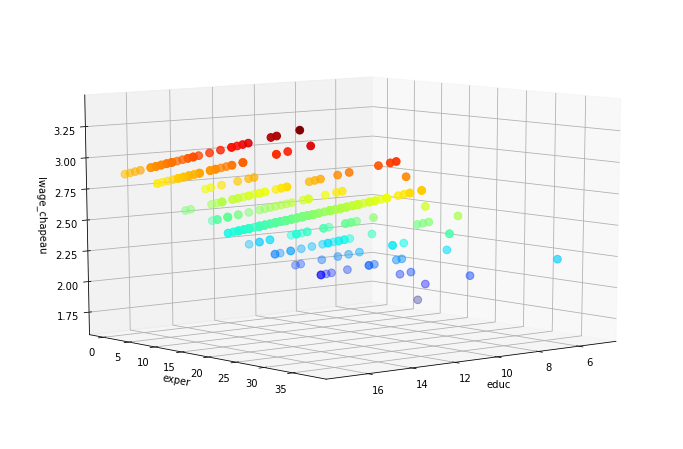

In [227]:
# Plot initialisation
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.educ, X.exper, lwage_chapeau, c=lwage_chapeau, cmap="jet", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(X.educ), max(X.educ)), (0, 0), (0,0))
yAxisLine = ((0, 0), (min(X.exper), max(X.exper)), (0,0))
zAxisLine = ((0, 0), (0,0), (min(lwage_chapeau), max(lwage_chapeau)))
 
# label the axes
ax.set_xlabel("educ")
ax.set_ylabel("exper")
ax.set_zlabel("lwage_chapeau")
ax.set_title(" ")
ax.view_init(10,50) # pour changement de l'angle de vue 
plt.show()

Le nuage de points observé ne forme pas un plan, donc il n'y a pas de relation  linéaire entre les variables wages, educ et expr.



## 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

L'hypothèse nulle est maintenant de la forme :   
 $H_0 : a_{kidsgt6} = a_{kidslt6}$. On réécrit  le modèle standard   

$\Rightarrow$ $log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + cte + \epsilon $   

\\

$\Rightarrow$ $log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}( kidslt6 + kidsgt6) + cte + \epsilon $  




In [228]:
# definit nos variables sour H0
Y_H0= log_wage
X_H0= data[["city","nwifeinc","educ", "exper"]]
X_H0["kidslt6+kidsgt6"] = data.kidslt6 + data.kidsge6
X_H0["Const"] = np.ones(X_H0.shape[0])


# definit nos variables sour H1
log_wage = data['wage'].apply(lambda x: np.log(x))
X=data[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
X["const"]=np.ones(X.shape[0])


# Calcul estimateur des MCO
model_H0 = sm.OLS(Y_H0, X_H0)
results_H0 = model_H0.fit()
residus_H0 = results_H0.resid

# Creation de la stat de fisher 
SCR0 = np.sum(np.array(residus_H0)**2) # somme des residus au carré 
SCR1 = np.sum(np.array(residus)**2) # somme des residus au carré 

# j ai un doute si on doit soustraire les dl par -1  #=> a revoir
dl0= X_H0.shape[0] -  X_H0.shape[1]  - 1
dl1 = X.shape[0] -  X.shape[1]  - 1

F= ((SCR0 - SCR1) / (dl0 - dl1)) / (SCR1 / dl1)

# Calcul de la P_value 
P_value = 1- stats.f.cdf(F, dl0 - dl1, dl1)

print("la statistique F veut  : ", F)
print("la P_Value est : ", P_value)



la statistique F veut  :  0.13786776145599483
la P_Value est :  0.710597243130811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Nous obetenons une P_Value  ≈  0.7 > 0.05, l'hypothèse  H0  est vrai. On en déduit que ce n'est pas l'âge des enfants qui influence un salaire, mais plutôt leur nombre.

## 14. Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

Pour rappel hétéroscédasticité dans le contexte d'un modèle de regression, c'est lorsque la variance des residus n'est pas constante.

Afin de determiner si notre modéle est hétéroscédastique, nous allons realiser le "White test", avec un risque de %. Nous procéderons comme suit:  

\\
- 1)  On entraine notre modèle de régression classique,   
$log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + a_{0} + \epsilon_{1}$   et on récupère notre résidu $r$


-  2)  on realise une seconde régression sur les résidus au carrés, sous la forme suivante : 
$r^2 =  b_{city}  city+ b_{nwifeinc}  nwifeinc+ b_{educ}  educ + b_{exper} exper + b_{kidsgt6}  kidslt6 + b_{kidsgt6}  kidsgt6 + b_{0} +  \epsilon2$ 

- 3) On pose notre hypothèse nulle : 
$H_0 :  b_{nwifeinc} = b_{educ} = ... = b_{kidsgt6} = 0 $, Le modèle sous $H_0$ est donc  => $r^2 =  b_{0} +  \epsilon2 $. Si H0 est vrai, il existe une indépendance linéaire entre le carré des résidus  et les variables étudiées, et donc l'hypothèse d'hétéroscédasticité (hypothèse nulle) est valide. Dans le cas contraire, il faudra déterminer les coefficient b_ non nuls, qui déterminent la dépendance linéaire des carrés des résidus par rapports à ces variables. 








In [229]:
#########################
######## Etape 1 ########
#########################

# Modéle normal

log_wage = data['wage'].apply(lambda x: np.log(x))

X=data[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
X["const"]=np.ones(X.shape[0])

model_classique = sm.OLS(log_wage, X)
results = model_classique.fit()
residus = results.resid

#########################
######## Etape 2 ########
#########################

# modéle avec residu au carré

u_chapeau= residus**2
model_2=sm.OLS(u_chapeau, X)
res2ults_2 = model_2.fit()
residus_2 = res2ults_2.resid
res2ults_2.params


#########################
######## Etape 3 ########
#########################

# Sous H0
Y_H0=u_chapeau
X_H0=X.const
model_H0=sm.OLS(Y_H0, X_H0)
results_H0= model_H0.fit()
residus_H0 = results_H0.resid


# Creation de la stat de fisher 
SCR0 = np.sum(np.array(residus_H0)**2) # somme des residus au carré 
SCR1 = np.sum(np.array(residus_2)**2) # somme des residus au carré 

# j ai un doute si on doit soustraire les dl par -1  #=> a revoir
dl0= X_H0.shape[0] -  1  - 1
dl1 = X.shape[0] -  X.shape[1]  - 1

F= ((SCR0 - SCR1) / (dl0 - dl1)) / (SCR1 / dl1)

# Calcul de la P_value 
P_value = 1- stats.f.cdf(F, dl0 - dl1, dl1)

print("la statistique F veut  : ", F)
print("la P_Value est : ", P_value)

la statistique F veut  :  2.003924882718778
la P_Value est :  0.06398648165699261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Pour un risque $\alpha$ = 5%  notre modèle est bien homoscédastique car le p-value trouvé est environ égal à 0.06>0.05 (on est  vraiment à la limite)  mais pour  $\alpha$ = 10% notre modèle est considéré comme heteroscdastique.

In [230]:
#########################
######## Etape 1 ########
#########################

# Modéle normal
log_wage = data['wage'].apply(lambda x: np.log(x))
X=data[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
X["const"]=np.ones(X.shape[0])
h=np.sqrt(X[var])
model_=sm.OLS(log_wage,X,weight=1/h)
results = model_.fit()
residus = results.resid

#Definition des parametre de l'estimateur WLS
g = np.dot(sm.add_constant(X), results.params)
w = np.sqrt(np.exp(g))
Y_residus_w = residus / w
# On definit la matrice des poids
Weight = data.copy()
    
#########################
######## Etape 2 ########
#########################
# # Esitmateur WLS
for col in ['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6'] :
    Weight[col] = Weight[col]/w 

# Modèle contraint
X_weight = Weight[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]

model = sm.OLS(Y_residus_w, sm.add_constant(X_weight))
ols = model.fit()

SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = np.ones((Weight.shape[0], 1))

ols_2 = sm.OLS(Y_residus_w, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("p_value : " , p_val)

p_value :  0.9853584944934253


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


L'estimateur WLS a rendu le modèle homoscédastique pour $\alpha$=10%, en effet nous avons une p-value de 0.98.

## 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs

Principe : Vérifier que la régression est la même dans les sous-parties de l’échantillon. Soit parce la
relation est non-linéaire (point d’inflexion), soit parce qu’elles correspondent à des sous-populations (ce qui est notre cas)
différentes. Nous allons donc realiser le test de chow. Pour ce faire,nous allons procéder comme suit :    

- On crée une variable dont la modalité 1 sera attribuée aux femmes ayant 43 ans et plus, 0 sinon.

- On realise une regression non contrainte (notre modèle classique) : $log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + a_{0} + \epsilon_{1}$. On récupère ensuite sa somme des résidus aux carrées $RSS_{R}$.  

- Une seconde régression avec uniquement les femmes ayant 43 ans et plus : 
 $log(wage) = b_{city}  city+ b_{nwifeinc}  nwifeinc+ b_{educ}  educ + b_{exper} exper + b_{kidsgt6}  kidslt6 + b_{kidsgt6}  kidsgt6 + b_{0} + \epsilon_{2}$. On récupère ensuite sa somme des résidus aux carrées $RSS_{+43}$. 



 - Une dernière régression avec uniquement les femmes de moins de  43 ans: 
 $log(wage) = c_{city}  city+ c_{nwifeinc}  nwifeinc+ c_{educ}  educ + c_{exper} exper + c_{kidsgt6}  kidslt6 + c_{kidsgt6}  kidsgt6 + c_{0} + \epsilon_{3}$. On récupère ensuite sa somme des résidus aux carrées $RSS_{-43}$.  


 - Construction d'un test de Fisher : 
 $F=\frac{\frac{RSS_R - RSS_{+43} -  RSS_{-43}}{K}}{ \frac{RSS_{+43} +  RSS_{-43}}{T-2K}}$  avec   $K$ nombre de variable et $T$ le nombre de modalité
                    





In [231]:
#########################
######## Etape 1 ########
#########################

#### On crée la variable discriminante
# data["discrim"] = [1 if  x>= 43 else 0 for x in  data.age ]

#### Separation de notre data +43 et -43
Plus_de_43 = data[data.age > 43]
Moins_de_43 = data[data.age <= 43]

# modele +43
X = sm.add_constant(Plus_de_43[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model_plus43 = sm.OLS(Plus_de_43.lwage.apply(float), X)
resultats_model_plus43 = model_plus43.fit()

# modele -43
X = sm.add_constant(Moins_de_43[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model_moins43 = sm.OLS(Moins_de_43.lwage.apply(float), X)
resultats_model_moins43 = model_moins43.fit()

print("p_value :", stats.ttest_ind(Moins_de_43.lwage.apply(float), Plus_de_43.lwage.apply(float))[1])


p_value : 0.6856897347649467


Nous obetnons une p-value=0.69, nous n'avons donc pas un changement de strucutre

## 16. Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez

On découpe huseduc selon les différentes  composant le quartile, pour obetenir 4 nouvelles variables : col_(3.999, 12.0], 	col_(12.0, 14.0], 	col_(14.0, 17.0]

---



In [233]:
Quartil_Huseduc = pd.DataFrame(pd.get_dummies(pd.qcut(data.huseduc, 3),
                                              prefix='col'))

Dans "data", on ajoute nous 3 nouvelles colonnes 

In [234]:
New_data = pd.concat([data,Quartil_Huseduc], axis=1)
New_data

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq,"col_(3.999, 12.0]","col_(12.0, 14.0]","col_(14.0, 17.0]"
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196,1,0,0
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25,1,0,0
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225,1,0,0
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36,1,0,0
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,12,5.3061,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4,1,0,0
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,8,7.2709,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441,1,0,0
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,11,8.1776,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484,1,0,0
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,12,7.1006,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196,1,0,0


  

---



On realise une regression linéraire du modèle :  
$log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + a_{q1} col_(3.999, 12.0] + a_{q2} col_(12.0, 14.0]+ a_{q3} col_(14.0, 17.0]+ a_{0} + \epsilon_{1}$     

ce modèle sera donc notre hypothèse $H_1$  

L'hypothèse $H_0$ est donné par :  
$H_0 :  a_{q1} = a_{q2} = a_{q3}  = 0$, Le modèle contraint qui en découle est donc :

$log(wage) = a_{city}  city+ a_{nwifeinc}  nwifeinc+ a_{educ}  educ + a_{exper} exper + a_{kidsgt6}  kidslt6 + a_{kidsgt6}  kidsgt6 + a_{0} + \epsilon_{1}$  


In [237]:
############### definit nos variables sour H0   ##################
Y_H0= New_data['wage'].apply(lambda x: np.log(x))
X_H0= New_data[["city","nwifeinc","educ", "exper", "kidslt6", "kidsge6"]]
X_H0["Const"] = np.ones(X_H0.shape[0])

# Calcul estimateur des MCO
model_H0 = sm.OLS(Y_H0, X_H0)
results_H0 = model_H0.fit()
residus_H0 = results_H0.resid


############### definit nos variables sour H1 ############### 
log_wage = New_data['wage'].apply(lambda x: np.log(x))
X=New_data[['city','educ','exper','nwifeinc','kidslt6','kidsge6', "col_(3.999, 12.0]",	"col_(12.0, 14.0]",	"col_(14.0, 17.0]"]]    
X["const"]=np.ones(X.shape[0])

# Calcul estimateur des MCO
model_H1 = sm.OLS(log_wage, X)
results_H1 = model_H1.fit()
residus_H1 = results_H1.resid



# Creation de la stat de fisher 
SCR0 = np.sum(np.array(residus_H0)**2) # somme des residus au carré 
SCR1 = np.sum(np.array(residus_H1)**2) # somme des residus au carré 

# j ai un doute si on doit soustraire les dl par -1  #=> a revoir
dl0= X_H0.shape[0] -  X_H0.shape[1]  - 1
dl1 = X.shape[0] -  X.shape[1]  - 1

F= ((SCR0 - SCR1) / (dl0 - dl1)) / (SCR1 / dl1)

# Calcul de la P_value 
P_value = 1- stats.f.cdf(F, dl0 - dl1, dl1)

print("la statistique F veut  : ", F)
print("la P_Value est : ", P_value)



la statistique F veut  :  1.684549426984688
la P_Value est :  0.1696655025985131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Nous obetenons une P_Value ≈ 0.17 > 0.05, l'hypothèse H0 est vraie. On en déduisit le nombre d'années d'études dues marie n'est pas significatif sur le log(salaire) de la femme